# Churn Data Analysis

In [2]:
#importing libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
#Combine two CSV files to proceed with processing
churn80 = pd.read_csv('churn-bigml-80.csv')
churn20 = pd.read_csv('churn-bigml-20.csv')
df = pd.concat([churn80,churn20], ignore_index=True)

Exploratory Data Analysis 

In [4]:
#Check the data and structure of the dataset
df.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
9,RI,74,415,No,No,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,False


In [5]:
#Check the overview information of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [6]:
df.describe(include=['O'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


Data Cleaning

In [7]:
#check null
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [8]:
# Convert the 'Churn' column to integer type.
df['Churn'] = df['Churn'].astype(int)
#Count the frequency of different values in the 'Churn' column
df.Churn.value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

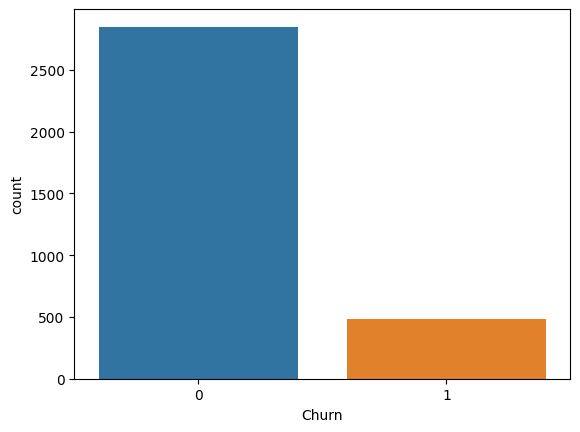

In [9]:
sns.countplot(x='Churn',data=df)

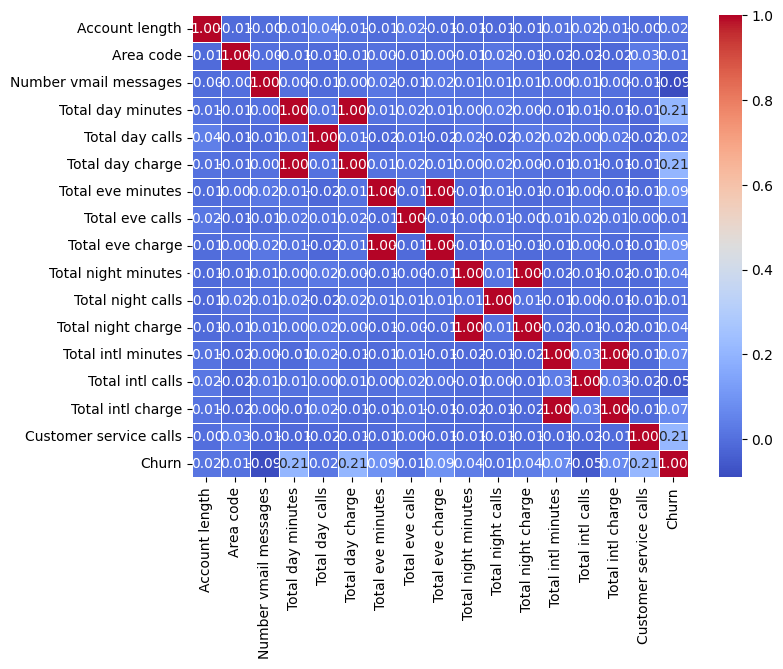

In [10]:
#Select only the columns with numeric data types
numeric_cols = df.select_dtypes(include=['int', 'float']).columns
# Calculate the correlation matrix for the selected numeric columns
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

Text(0.5, 0, 'TOTAL DAY CHARGE vs CHURN RATE')

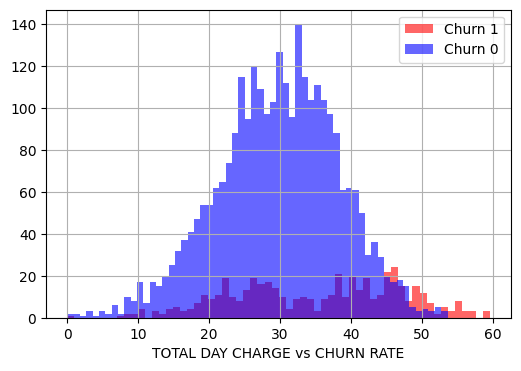

In [36]:
plt.figure(figsize=(6,4))
# Create a histogram for 'Total day charge' for customers who churned (Churn=1)
df[df['Churn']==1]['Total day charge'].hist(bins=60,color = 'red',label = 'Churn 1',alpha = 0.6)
# Create a histogram for 'Total day charge' for customers who did not churn (Churn=0)
df[df['Churn']==0]['Total day charge'].hist(bins = 60,color = 'blue',label = 'Churn 0',alpha = 0.6)
plt.legend()
plt.xlabel('TOTAL DAY CHARGE vs CHURN RATE')

<Axes: xlabel='Customer service calls', ylabel='count'>

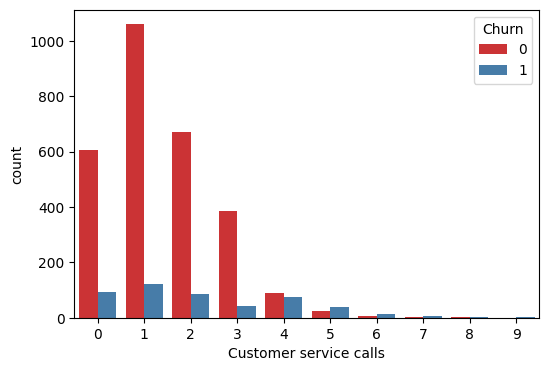

In [37]:
plt.figure(figsize=(6,4))
# Create a count plot for 'Customer service calls' with hue based on 'Churn'
sns.countplot(x='Customer service calls',hue = 'Churn',data=df,palette='Set1' )

<Axes: xlabel='International plan', ylabel='count'>

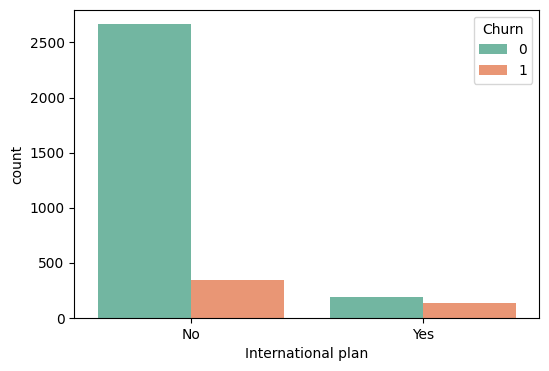

In [38]:
plt.figure(figsize=(6,4))
# Create a count plot for 'International plan' with hue based on 'Churn'
sns.countplot(x ='International plan',hue='Churn',data = df,palette='Set2')

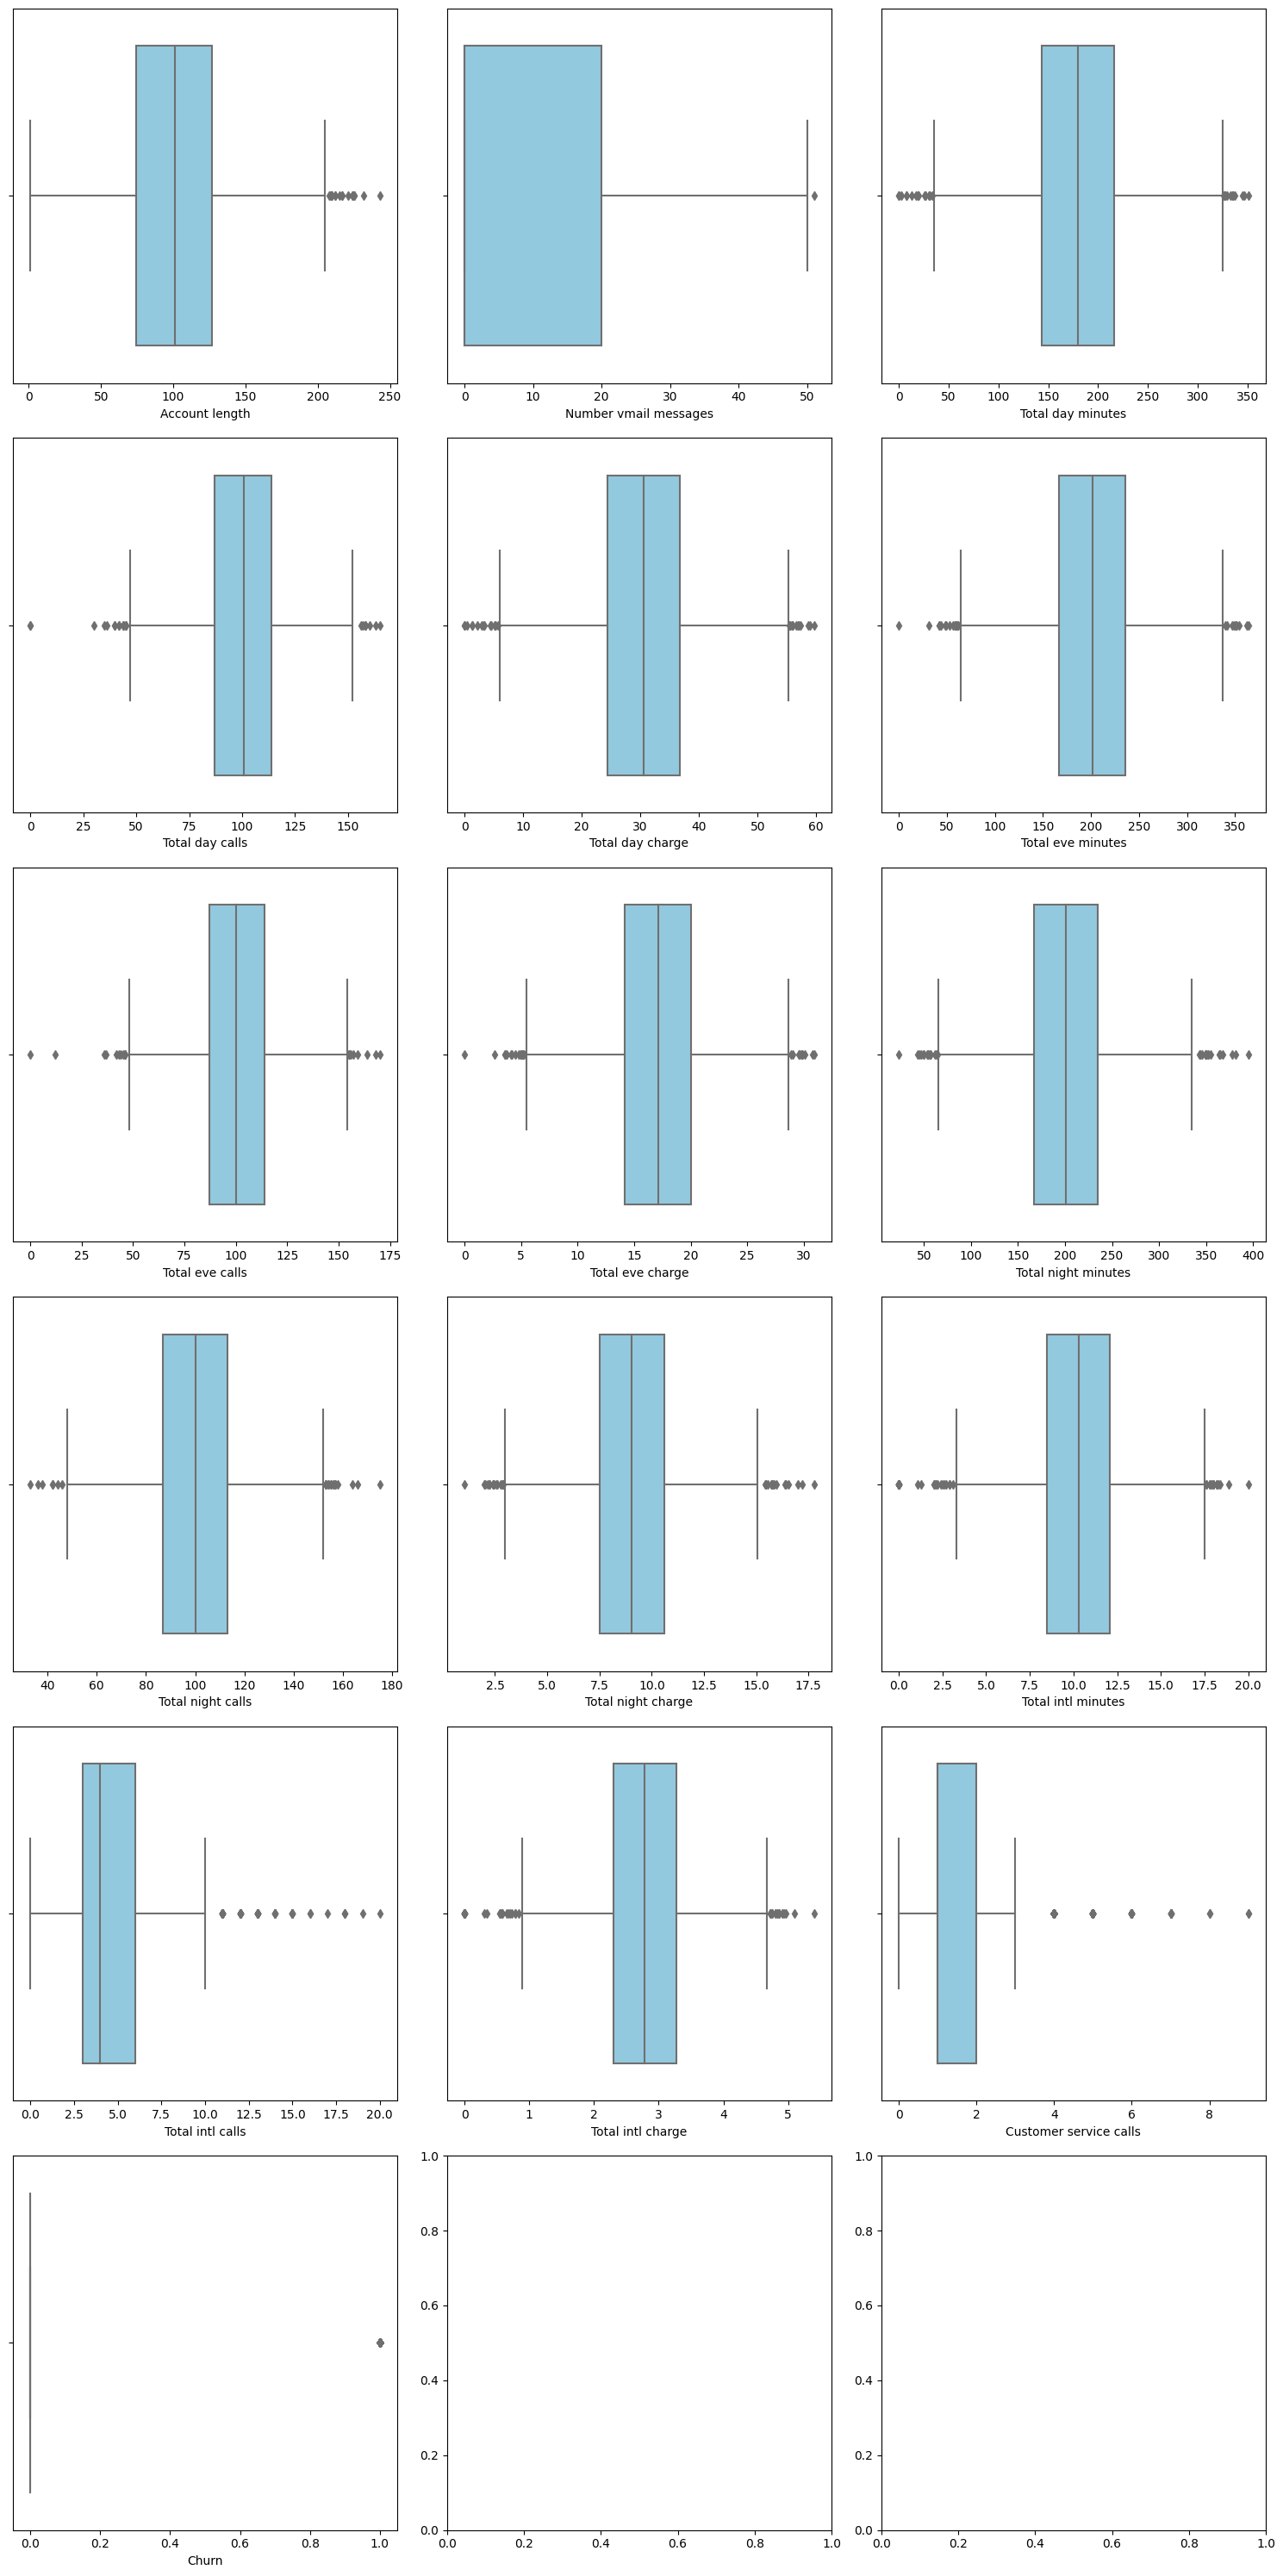

In [14]:
def detect_outliers(df):
    # Initialize a dictionary to hold columns with outliers
    outlier_columns = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25) # First quartile (25th percentile)
        Q3 = df[column].quantile(0.75) # Third quartile (75th percentile)
        IQR = Q3 - Q1 # Interquartile range (IQR)
        lower_bound = Q1 - 1.5 * IQR # Lower bound for outliers
        upper_bound = Q3 + 1.5 * IQR # Upper bound for outliers
        # Detect outliers in the column
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        if not outliers.empty:
            outlier_columns[column] = outliers
    return outlier_columns
outlier_columns = detect_outliers(df)
max_cols_per_row = 3
num_rows = -(-len(outlier_columns) // max_cols_per_row) 
fig, axes = plt.subplots(num_rows, max_cols_per_row, figsize=(15, num_rows*5))
# Plot boxplots for each column with outliers
for i, (column, outliers_df) in enumerate(outlier_columns.items()):
    row_idx = i // max_cols_per_row
    col_idx = i % max_cols_per_row
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
    sns.boxplot(x=df[column], color='skyblue', ax=ax) 
plt.tight_layout()
plt.show()


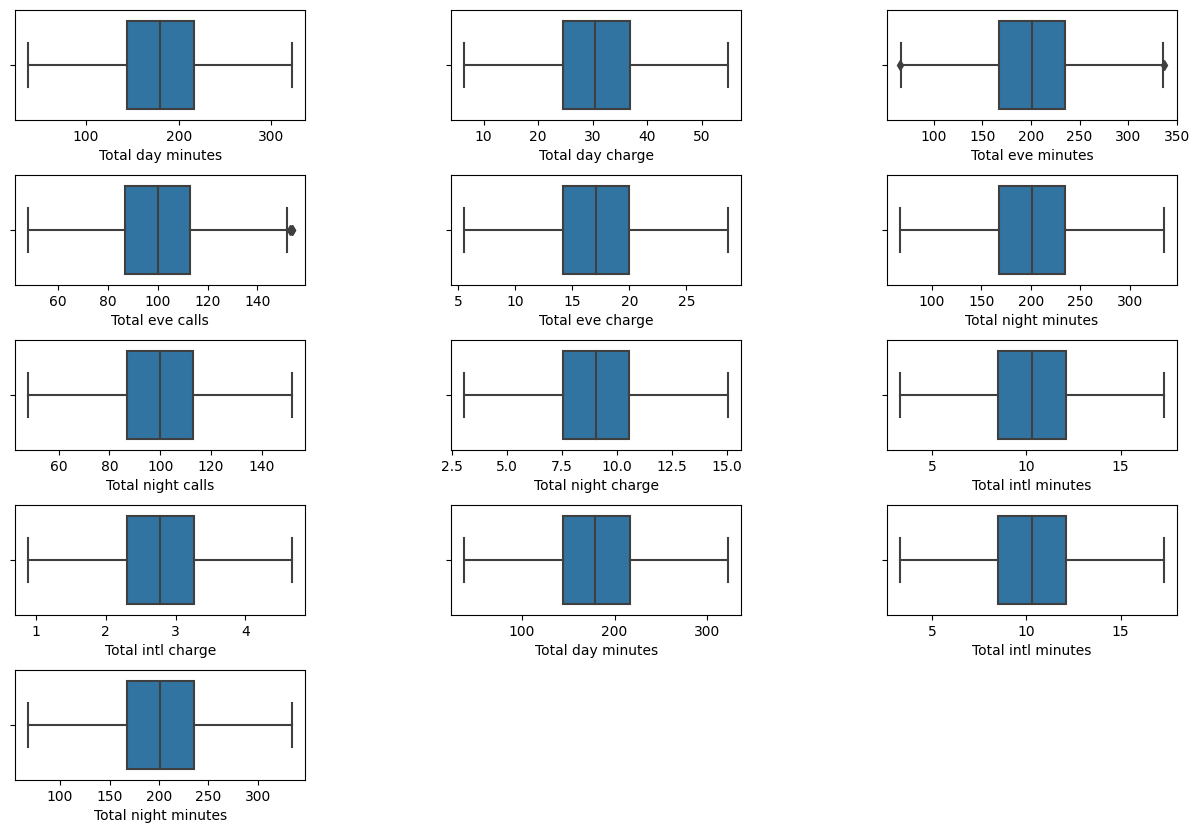

In [15]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df
# Define columns to remove outliers from
columns = ['Total day minutes','Total day charge','Total eve minutes','Total eve calls','Total eve charge',\
           'Total night minutes','Total night calls','Total night charge','Total intl minutes',\
            'Total intl charge','Total day minutes','Total intl minutes','Total night minutes'] 
# Remove outliers from the DataFrame
cleaned_df = remove_outliers(df, columns)
# Plot boxplots for cleaned DataFrame
plt.figure(figsize=(15, 10))
num_cols_per_row = 3
num_rows = -(-len(columns) // num_cols_per_row) 
for i, column in enumerate(columns, 1):
    plt.subplot(num_rows, num_cols_per_row, i)
    sns.boxplot(x=cleaned_df[column])
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()


In [16]:
# Selecting relevant features for analysis
features = df[['Account length','International plan','Voice mail plan','Number vmail messages','Total day calls','Total day charge','Total eve calls','Total eve charge',
      'Total night calls','Total night charge','Total intl calls','Total intl charge','Customer service calls']]

In [17]:
# Selecting the target variable for analysis
target = df[['Churn']]

In [18]:
# Using one-hot encoding to convert categorical variables into numerical ones
features = pd.get_dummies(features,columns=['International plan','Voice mail plan'],drop_first=True)

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Scale the features using MinMaxScaler
scaler=MinMaxScaler()
features = pd.DataFrame(scaler.fit_transform(features),columns=features.columns)
# Split the dataset into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [20]:

from sklearn.linear_model import LogisticRegression
# Initialize and train the Logistic Regression classifier
Log_clf = LogisticRegression(random_state=42,class_weight='balanced').fit(features_train, target_train)
# Predict the target variable for the training set
Log_Train_Pred = Log_clf.predict(features_train)

C:\Users\84936\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
Log_clf.intercept_

array([-6.02795005])

In [22]:
Log_clf.coef_

array([[ 0.25538586,  0.90427331,  0.55149456,  3.84636127,  0.13737443,
         2.44357522,  0.01528307,  0.77565347, -1.00860547,  1.25937902,
         4.86038877,  2.2895134 , -1.33837328]])

In [23]:
# Predicting the target variable using the trained logistic regression model on the training features
Log_Train_Pred = Log_clf.predict(features_train)

In [39]:
from sklearn.metrics import classification_report

In [40]:
# Printing the classification report for the training set
print(classification_report(target_train,Log_Train_Pred))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86      2276
           1       0.38      0.76      0.51       390

    accuracy                           0.78      2666
   macro avg       0.66      0.77      0.68      2666
weighted avg       0.87      0.78      0.81      2666



In [26]:
# Making predictions on the test set using the logistic regression model
Log_Test_Pred = Log_clf.predict(features_test)

In [27]:
print(classification_report(target_test,Log_Test_Pred))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86       574
           1       0.35      0.69      0.47        93

    accuracy                           0.78       667
   macro avg       0.65      0.74      0.66       667
weighted avg       0.86      0.78      0.81       667



In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
RFclf = RandomForestClassifier(n_estimators=300,max_depth=7,min_samples_leaf=5,class_weight='balanced',random_state=42)


In [30]:
RFclf.fit(features_train,target_train)

C:\Users\84936\AppData\Local\Temp\ipykernel_4488\2004024834.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFclf.fit(features_train,target_train)


RandomForestClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=5,
                       n_estimators=300, random_state=42)

In [31]:
RFclf_Train_pred=RFclf.predict(features_train)

In [32]:
print(classification_report(target_train,RFclf_Train_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2276
           1       0.83      0.86      0.84       390

    accuracy                           0.95      2666
   macro avg       0.90      0.92      0.91      2666
weighted avg       0.95      0.95      0.95      2666



In [33]:
RFclf_Test_pred=RFclf.predict(features_test)

In [34]:
print(classification_report(target_test,RFclf_Test_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       574
           1       0.83      0.82      0.82        93

    accuracy                           0.95       667
   macro avg       0.90      0.89      0.90       667
weighted avg       0.95      0.95      0.95       667



In [35]:
print('f1-score of LogisticRegression Model',classification_report(target_test,Log_Test_Pred))
print('f1-score of RandomForest Model',classification_report(target_test,RFclf_Test_pred))

f1-score of LogisticRegression Model               precision    recall  f1-score   support

           0       0.94      0.79      0.86       574
           1       0.35      0.69      0.47        93

    accuracy                           0.78       667
   macro avg       0.65      0.74      0.66       667
weighted avg       0.86      0.78      0.81       667

f1-score of RandomForest Model               precision    recall  f1-score   support

           0       0.97      0.97      0.97       574
           1       0.83      0.82      0.82        93

    accuracy                           0.95       667
   macro avg       0.90      0.89      0.90       667
weighted avg       0.95      0.95      0.95       667

